In [1]:
from Preprocess import read_data,  get_date_features, impute_outliers
from Visualize import basic_info, features_info, plot_feature_histograms, plot_violin_plots,\
    visualize_continuous_data, convey_insights, correlation_matrix

## <font color="AliceBlue">Exhibition:</font> Generic Data Exploration

### Small Sample

In [2]:
x_data_d, _ = read_data(kind="all", fix=True)
x_data_d.head(5)

,stars,forks,watchers,isArchived,diskUsageKb,pullRequests,primaryLanguage,createdAt,defaultBranchCommitCount,license,assignableUserCount,codeOfConduct,languagesUsed,languagesSizes
0,18,46,25,0,354726,810,JavaScript,2019-08-27 00:31:27+00:00,3404.0,MIT License,94,-1,"JavaScript, HTML, CSS, Ruby, Shell","440575, 440476, 137861, 11340, 878"
1,5,4,2,0,3016,0,C,2011-04-28 15:28:49+00:00,170.0,Other,1,-1,"C, CoffeeScript, JavaScript, Python, Ruby","1639525, 19776, 10833, 8042, 128"
2,33,3,1,1,3238,20,JavaScript,2020-01-16 11:07:25+00:00,153.0,GNU General Public License v3.0,1,-1,JavaScript,84201
3,9,6,2,0,628,2,C#,2014-06-23 14:26:21+00:00,4.0,Microsoft Public License,1,-1,"C#, Puppet","17202, 856"
4,14,4,2,0,7607,2,Python,2018-07-19 03:00:27+00:00,11.0,-1,1,-1,Python,29392


### Basic Info

In [3]:
basic_info(x_data_d)

Number of samples,Number of features
210001,14


### Variables Info

In [4]:
features_info(x_data_d)

stars,forks,watchers,isArchived,diskUsageKb,pullRequests,primaryLanguage,createdAt,defaultBranchCommitCount,license,assignableUserCount,codeOfConduct,languagesUsed,languagesSizes
Numerical,Numerical,Numerical,Binary,Numerical,Numerical,Categorical,Date,Numerical,Categorical,Numerical,Categorical,Composite,Composite
2033,1156,479,2,39921,1452,377,209558,4415,44,783,7,37808,164696
0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,8.0%,0.0%,0.0%,47.0%,0.0%,96.0%,0.0%,0.0%
9.45%,7.32%,6.19%,4.97%,13.19%,11.45%,0%,0.0%,8.77%,0%,15.36%,0%,0%,0%


### Numerical Variables Statistics

In [5]:
convey_insights(["Most max values are far beyond the mean and median which signals outliers",
                 "50% of repos have 12 stars or less, 4 forks or less, 3 watchers or less, 1 pull request or less, 27 commits or less",
                 "Compared to other features, stars vary more widely from repo to repo, followed by pull requests and forks",
                 "The maximum stars figure is realistic and forks can realistic given that clones trigger them"
                 ])
x_data_d.describe()

<h3><font color="pink" size=5>Insights</font></h3> <font size=4>
<font color="pink">✦</font> Most max values are far beyond the mean and median which signals outliers<br><br><font color="pink">✦</font> 50% of repos have 12 stars or less, 4 forks or less, 3 watchers or less, 1 pull request or less, 27 commits or less<br><br><font color="pink">✦</font> Compared to other features, stars vary more widely from repo to repo, followed by pull requests and forks<br><br><font color="pink">✦</font> The maximum stars figure is realistic and forks can realistic given that clones trigger them<br><br></font>

,stars,forks,watchers,isArchived,diskUsageKb,pullRequests,defaultBranchCommitCount,assignableUserCount
count,210001.000000,210001.000000,210001.000000,210001.000000,2.100010e+05,210001.000000,2.100010e+05,210001.000000
mean,76.609116,20.538778,7.092533,0.049709,2.467371e+04,24.449574,6.456966e+02,25.973414
std,1021.238211,206.199368,35.770983,0.217344,2.699473e+05,314.628183,1.767689e+04,366.524446
min,3.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-1.000000e+00,0.000000
25%,7.000000,1.000000,2.000000,0.000000,9.600000e+01,0.000000,9.000000e+00,1.000000
50%,12.000000,4.000000,3.000000,0.000000,5.180000e+02,1.000000,2.700000e+01,1.000000
75%,30.000000,11.000000,6.000000,0.000000,4.715000e+03,6.000000,8.900000e+01,2.000000
max,264811.000000,27028.000000,5923.000000,1.000000,4.179653e+07,81258.000000,1.154219e+06,9999.000000


### Variables Histogram

<h3><font color="pink" size=5>Insights</font></h3> <font size=4>
<font color="pink">✦</font> Outliers seem to have signficantly impacted the plots of many variables<br><br></font>

12it [00:00, 18.55it/s]


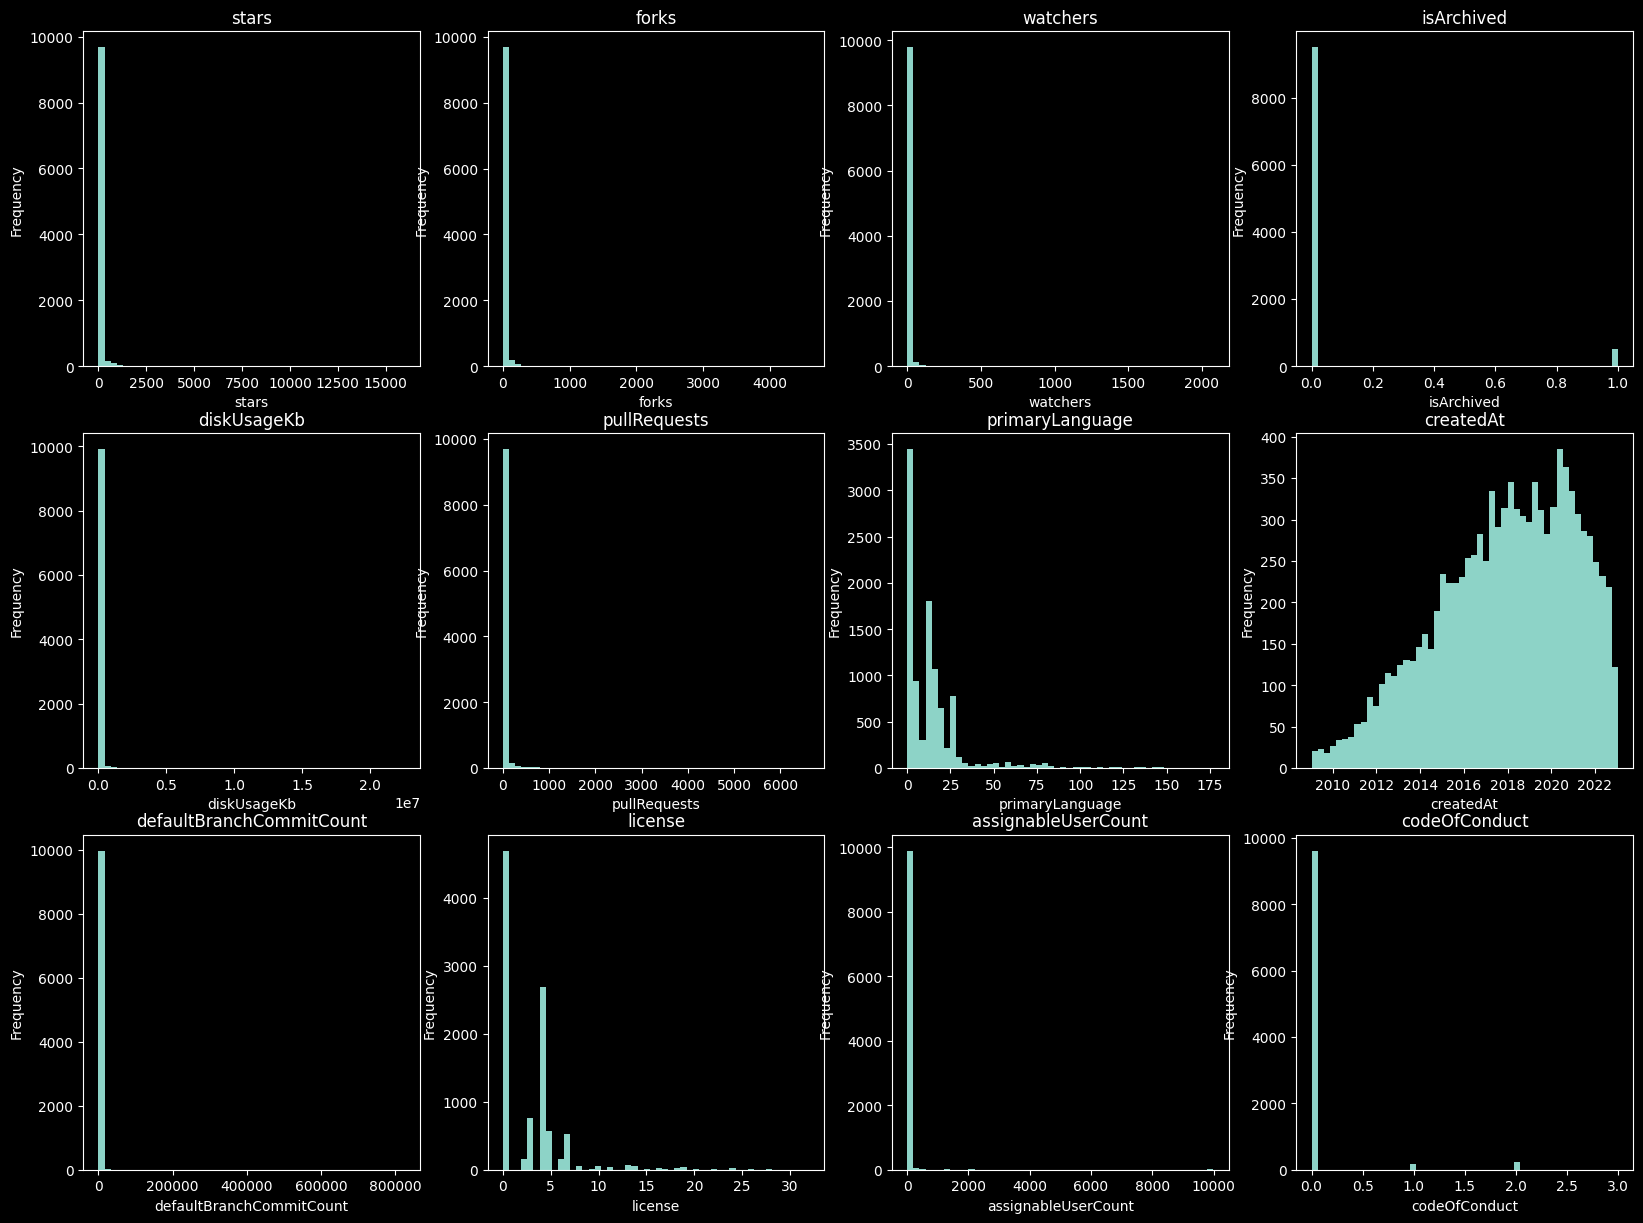

In [6]:
convey_insights(["Outliers seem to have signficantly impacted the plots of many variables",])
plot_feature_histograms(x_data_d, sample_size=10000)

### Handling Outliers

In [7]:
#x_data_o = impute_outliers(x_data_d, imputation_method="multiple", n_imputations=1)
x_data_o = impute_outliers(x_data_d,imputation_method="median")

### Numerical Variables Statistics

In [8]:
convey_insights(["After imputing the outliers with the median, there are no extreme values and the means/std make more sense",
                 "The medians are still unaffected but now forks vary more than pull requests"])
x_data_o.describe()

<h3><font color="pink" size=5>Insights</font></h3> <font size=4>
<font color="pink">✦</font> After imputing the outliers with the median, there are no extreme values and the means/std make more sense<br><br><font color="pink">✦</font> The medians are still unaffected but now forks vary more than pull requests<br><br></font>

,stars,forks,watchers,isArchived,diskUsageKb,pullRequests,defaultBranchCommitCount,assignableUserCount
count,210001.000000,210001.000000,210001.000000,210001.0,210001.000000,210001.000000,210001.000000,210001.000000
mean,17.490645,6.237932,3.778268,0.0,1752.641359,2.350198,47.536440,1.278184
std,17.684308,7.820098,3.389566,0.0,3353.877803,4.542198,62.319749,0.779376
min,3.000000,0.000000,0.000000,0.0,0.000000,0.000000,-1.000000,0.000000
25%,7.000000,1.000000,2.000000,0.0,96.000000,0.000000,9.000000,1.000000
50%,12.000000,4.000000,3.000000,0.0,518.000000,1.000000,27.000000,1.000000
75%,19.000000,8.000000,5.000000,0.0,1402.000000,2.000000,56.000000,1.000000
max,99.000000,41.000000,18.000000,0.0,18572.000000,24.000000,329.000000,5.000000


### Violin Plots

<h3><font color="pink" size=5>Insights</font></h3> <font size=4>
<font color="pink">✦</font> The distributions seem to all be left-skewed; closely forming a chi-square distribuion<br><br><font color="pink">✦</font> The distributions for license and programming language are multimodal<br><br><font color="pink">✦</font> ...<br><br></font>

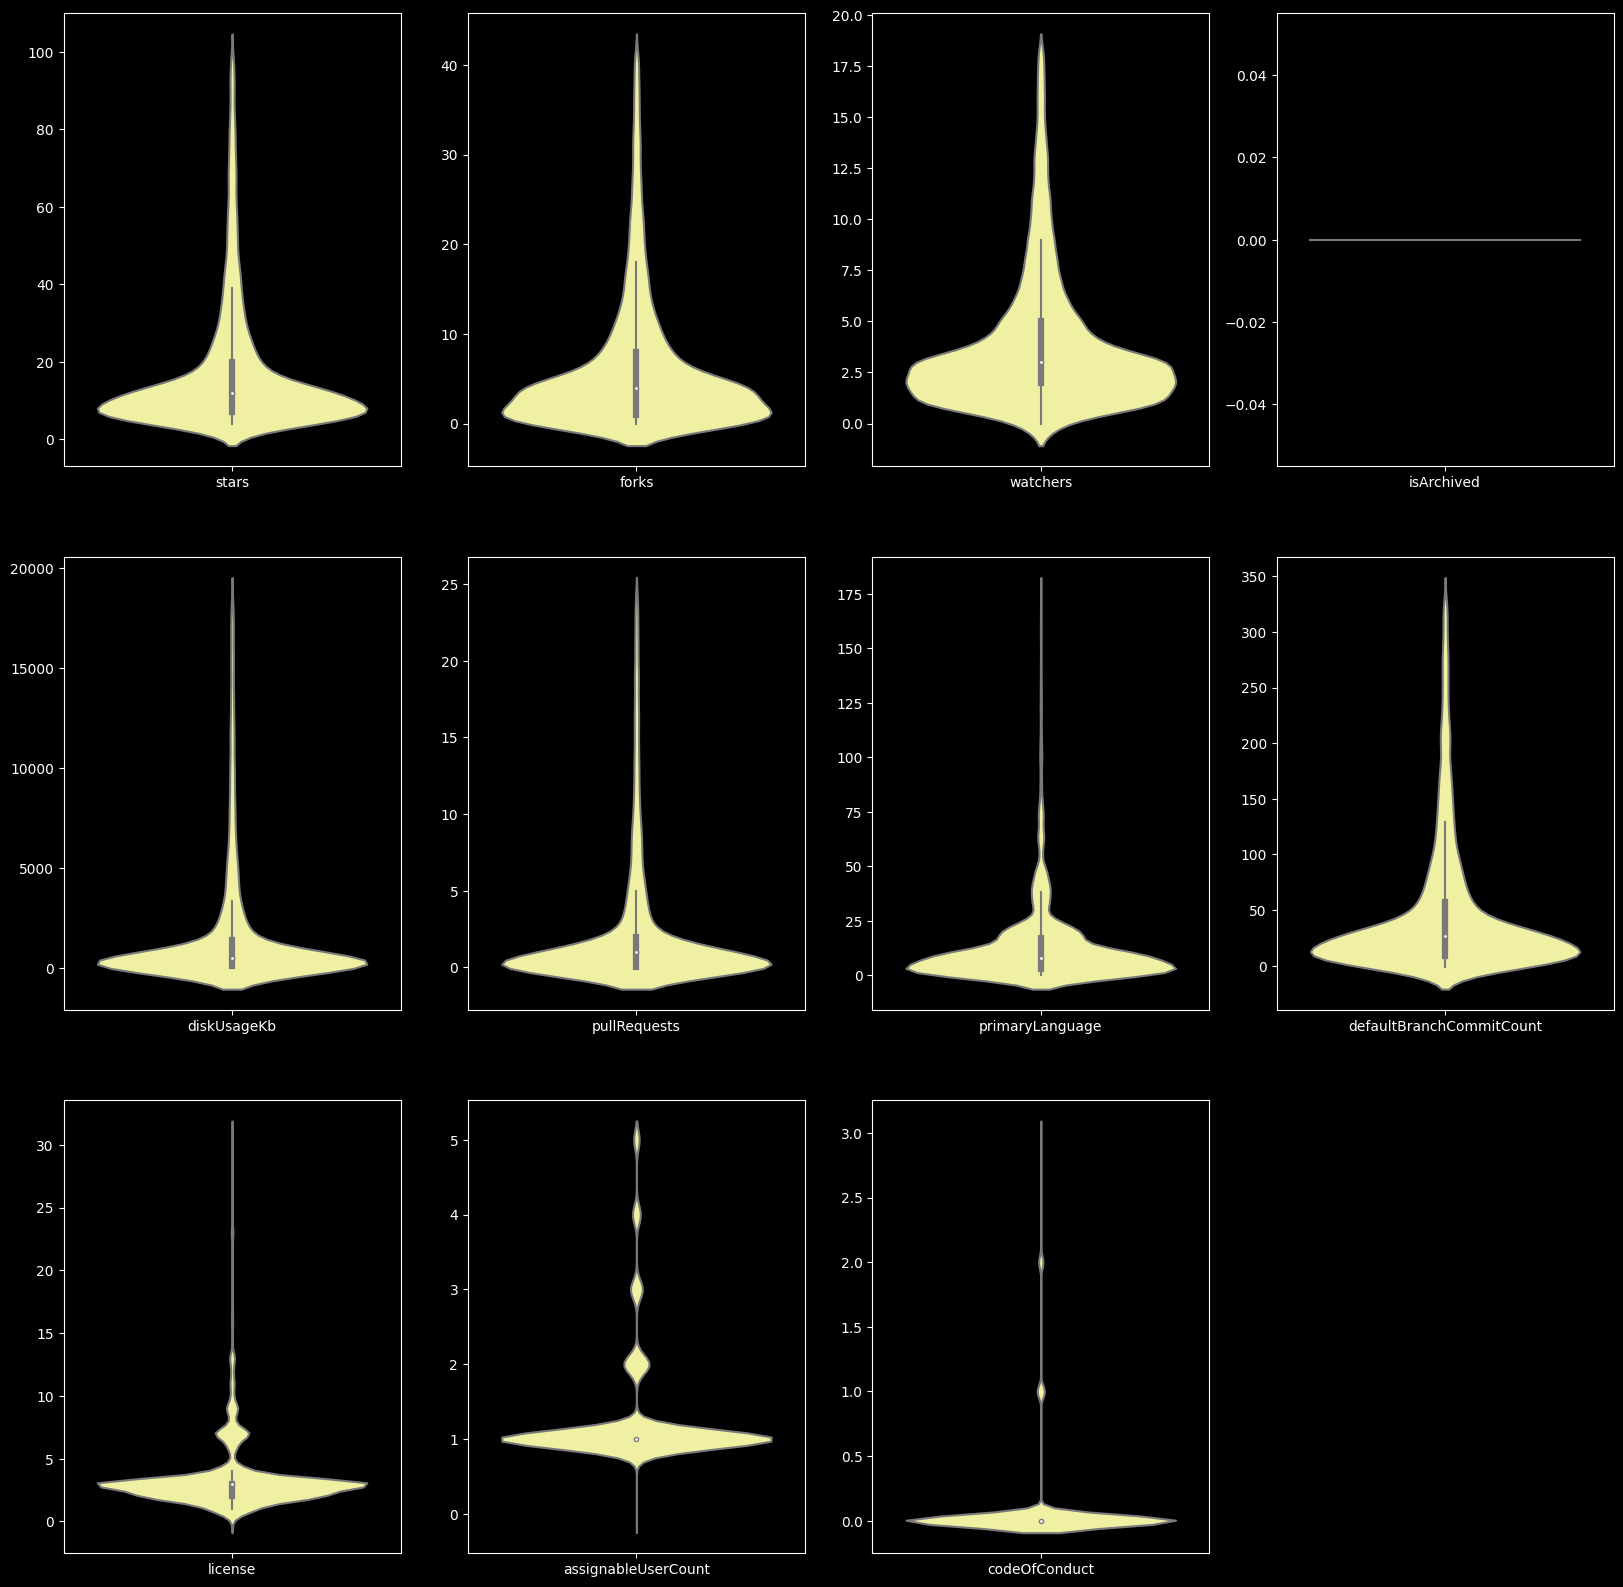

In [9]:
convey_insights(["The distributions seem to all be left-skewed; closely forming a chi-square distribuion",
                 "The distributions for license and programming language are multimodal",
                 "..."
                 ])
plot_violin_plots(x_data_o, 10000)

### Pair-wise Numerical Data Patterns

<h3><font color="pink" size=5>Insights</font></h3> <font size=4>
<font color="pink">✦</font> Most relationships seem complex (e.g., not linear)<br><br><font color="pink">✦</font> Stars/DiskUsage and Stars/Commits seem to be anti-correlated. Likewise for Forking/Commits<br><br><font color="pink">✦</font> Newer repos seem to have more variance over most features<br><br></font>

Number of continuous features: 8


28it [00:01, 16.98it/s]


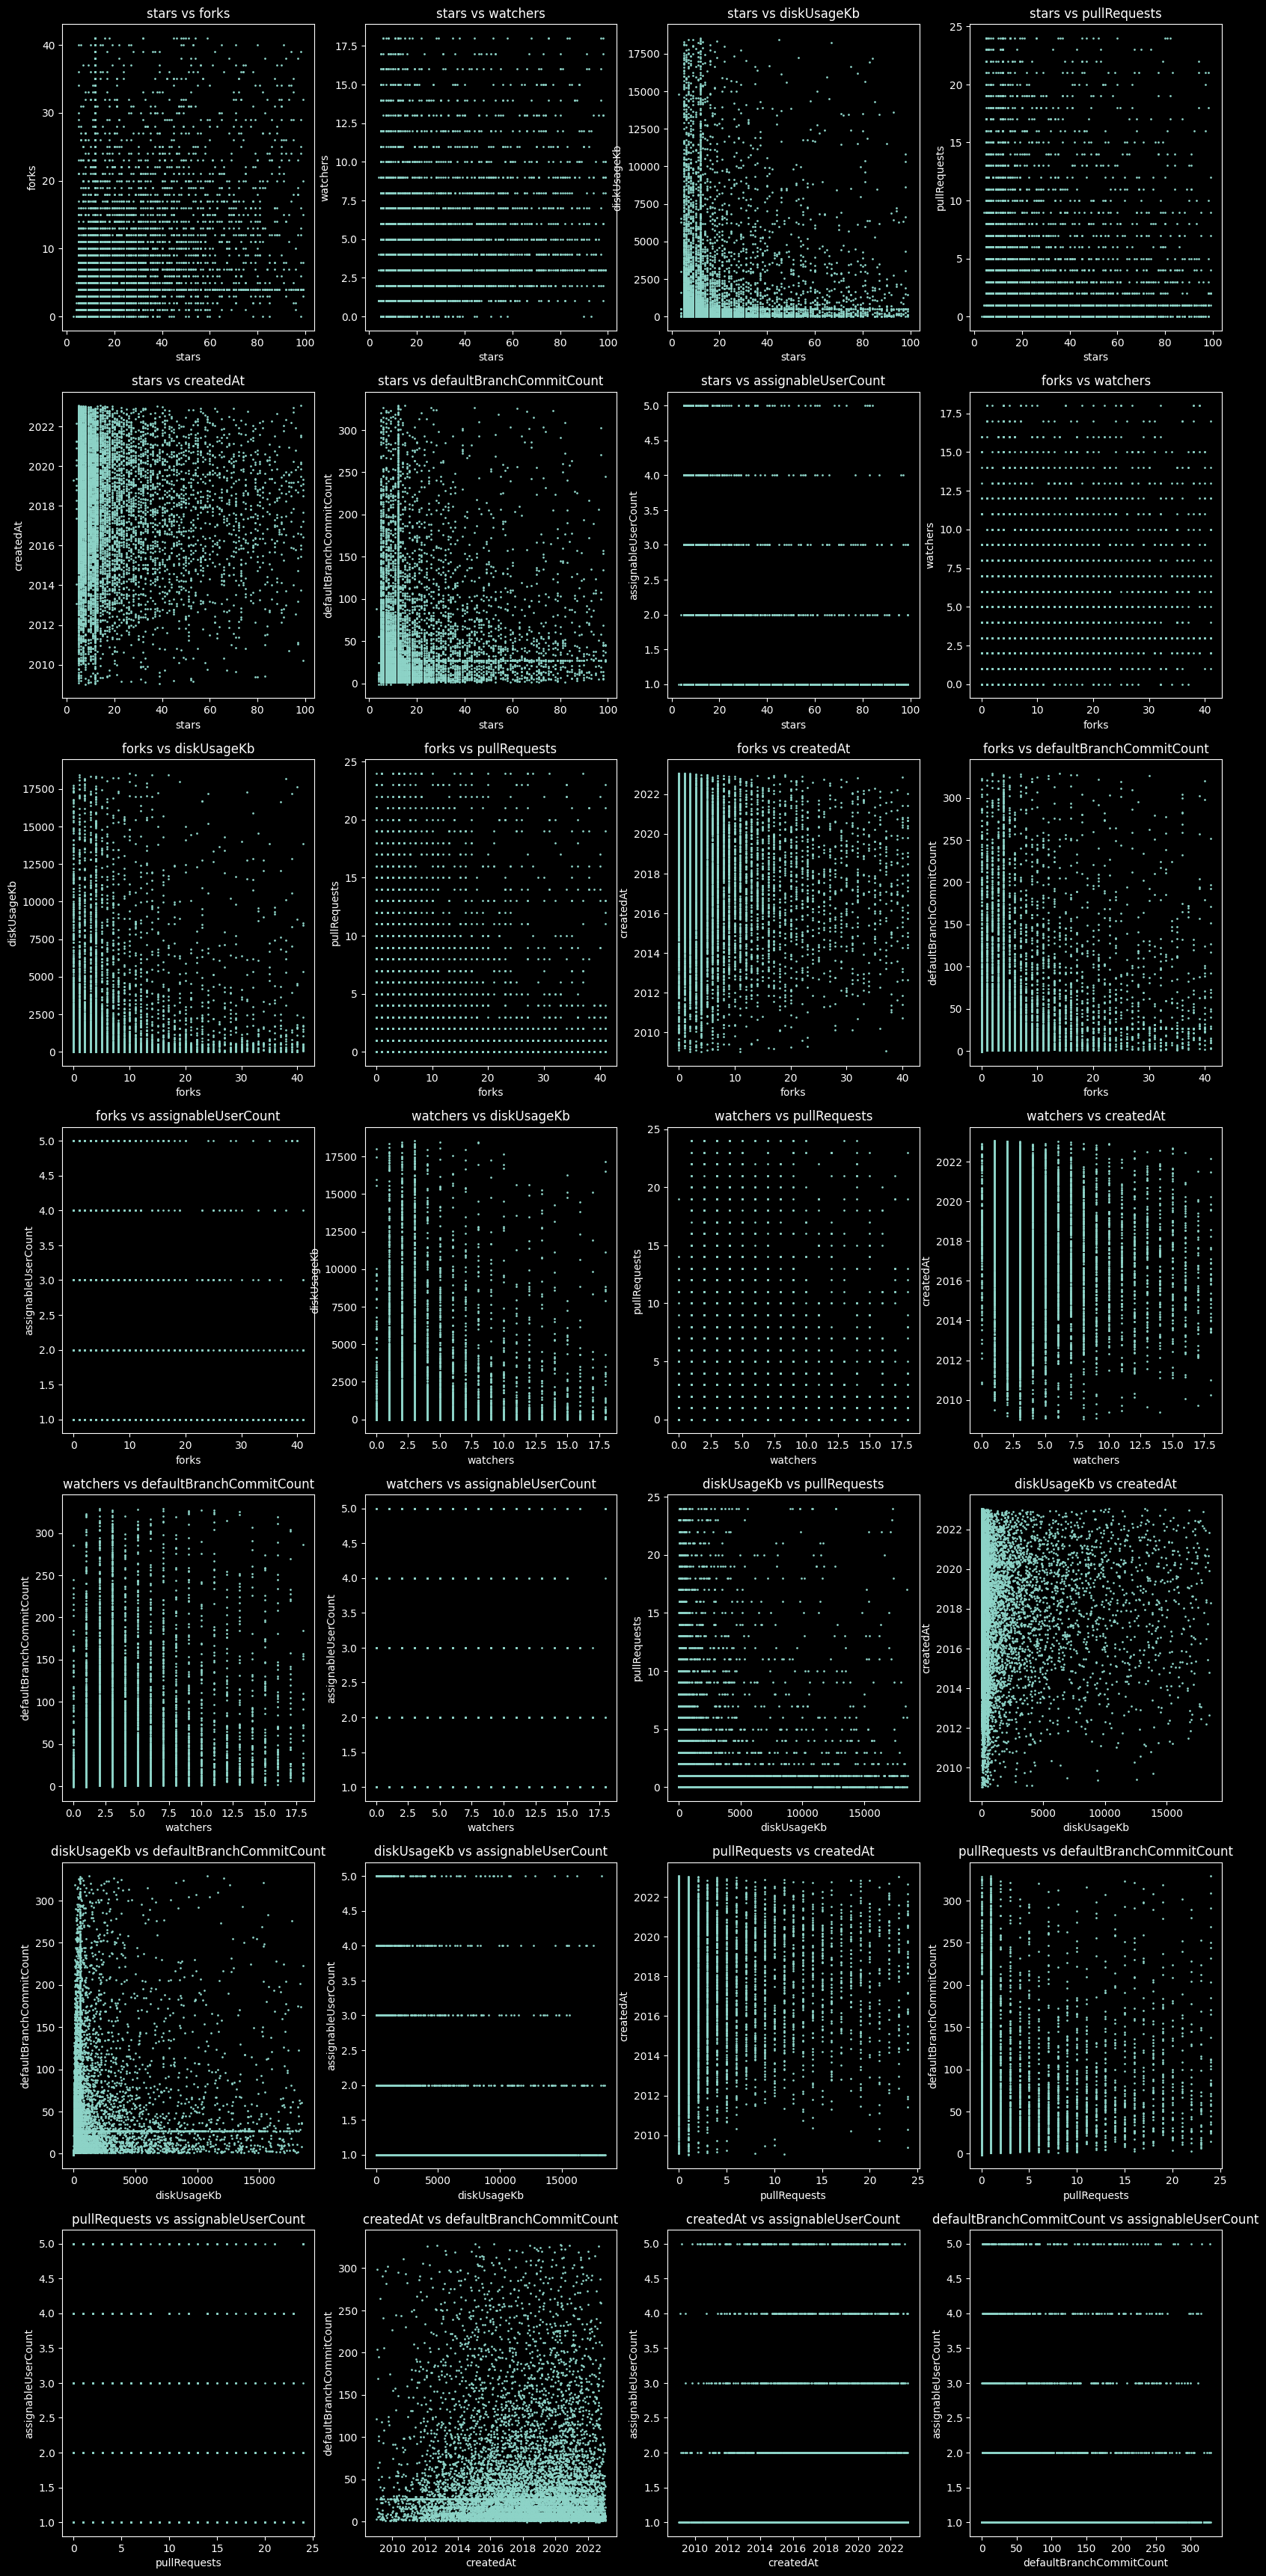

In [10]:
convey_insights(["Most relationships seem complex (e.g., not linear)",
                 "Stars/DiskUsage and Stars/Commits seem to be anti-correlated. Likewise for Forking/Commits",
                 "Newer repos seem to have more variance over most features"
                 ])
visualize_continuous_data(x_data_o, sample_size=10000)

### Pair-wise Numerical Data Corelations

<h3><font color="pink" size=5>Insights</font></h3> <font size=4>
<font color="pink">✦</font> Mostly no correlation between the variables<br><br><font color="pink">✦</font> Relevant positive correlation between stars and forks/watchers and forks<br><br><font color="pink">✦</font> Slight negative correlation between watchers and createdAt<br><br></font>

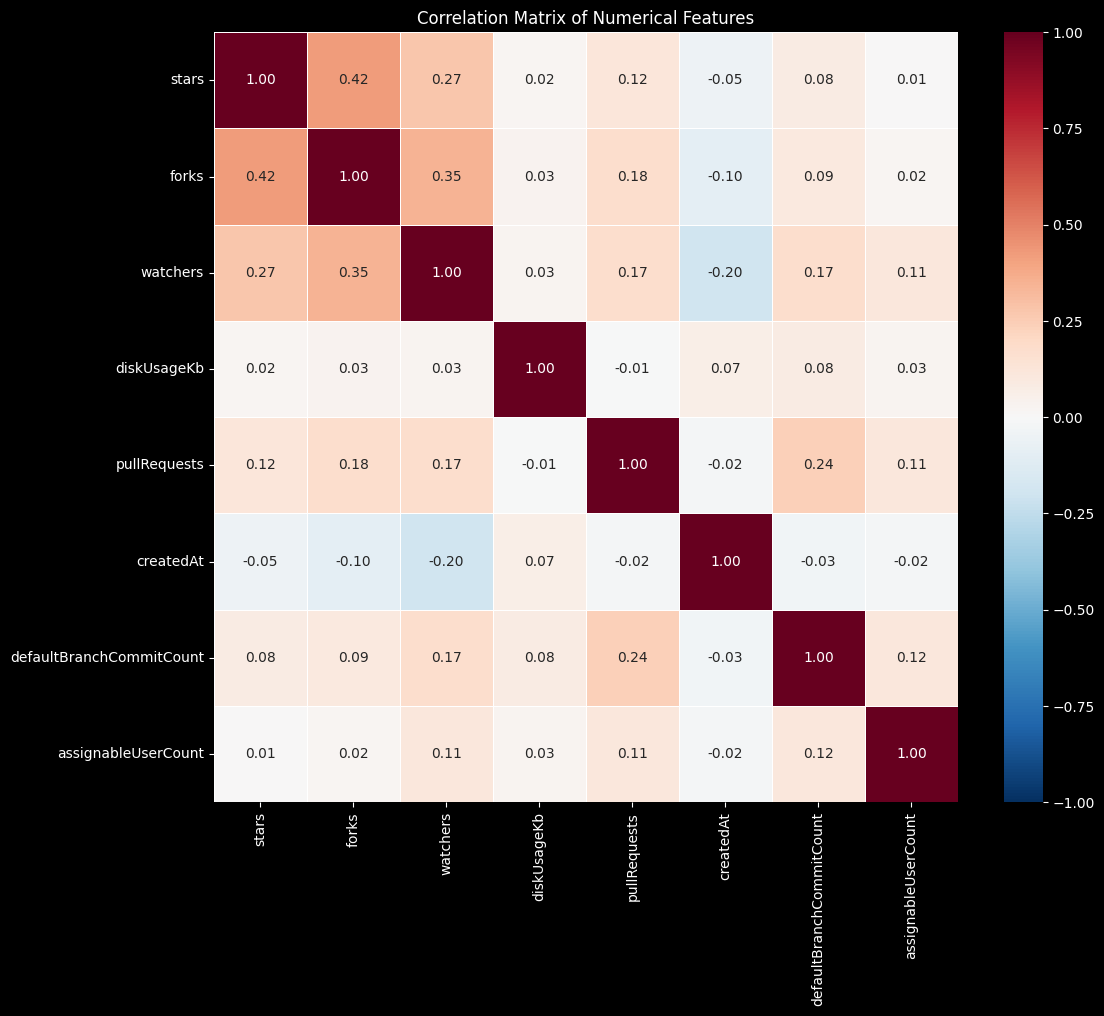

In [11]:
convey_insights(["Mostly no correlation between the variables",
                 "Relevant positive correlation between stars and forks/watchers and forks",
                 "Slight negative correlation between watchers and createdAt"
                 ])
correlation_matrix(x_data_o, sample_size=10000)

## Adventure: Reading & <font color="Cyan">Examining Data</font>

### <font color="Pink">Needed</font> Columns

In [12]:
x_data_d, _ = read_data()
x_data_d.head(5)

,owner,name,stars,forks,watchers,isFork,isArchived,languages,diskUsageKb,pullRequests,...,primaryLanguage,createdAt,pushedAt,defaultBranchCommitCount,license,assignableUserCount,codeOfConduct,forkingAllowed,nameWithOwner,parent
0,rsksmart,devportal,18,46,25,0,0,"[{'name': 'JavaScript', 'size': 440575}, {'nam...",354726,810,...,JavaScript,2019-08-27 00:31:27+00:00,2023-01-21T02:41:27Z,3404.0,MIT License,94,-1,1,rsksmart/devportal,-1.0
1,astrolet,precious,5,4,2,0,0,"[{'name': 'C', 'size': 1639525}, {'name': 'Cof...",3016,0,...,C,2011-04-28 15:28:49+00:00,2013-01-17T21:33:50Z,170.0,Other,1,-1,1,astrolet/precious,-1.0
2,saurabhdaware,visconf,33,3,1,0,1,"[{'name': 'JavaScript', 'size': 84201}]",3238,20,...,JavaScript,2020-01-16 11:07:25+00:00,2022-02-18T18:59:14Z,153.0,GNU General Public License v3.0,1,-1,1,saurabhdaware/visconf,-1.0
3,ChristianRuiz,MvvmCross-SecureStorage,9,6,2,0,0,"[{'name': 'C#', 'size': 17202}, {'name': 'Pupp...",628,2,...,C#,2014-06-23 14:26:21+00:00,2016-06-14T11:51:40Z,4.0,Microsoft Public License,1,-1,1,ChristianRuiz/MvvmCross-SecureStorage,-1.0
4,qiucongying,Mcue,14,4,2,0,0,"[{'name': 'Python', 'size': 29392}]",7607,2,...,Python,2018-07-19 03:00:27+00:00,2018-12-19T21:37:57Z,11.0,-1,1,-1,1,qiucongying/Mcue,-1.0


<span style="font-family:Avenir;">

<table style="width:100%; border-collapse:collapse; table-layout:fixed;">
  <thead>
    <tr>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">
      Set Expectations
      </font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">
      Collect Data
      </font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">
      Match Expectations & Data
      </font>
      </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      All columns will be needed in the analytics
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      Data is as shown, columns like nameWithOwner or name, etc. are not needed.
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      To let them match, we will drop the useless columns.
      </td>
    </tr>
  </tbody>
</table>

</span>



In [13]:
x_data_d, _ = read_data(handle_useless="obvious")
x_data_d.head(5)

,stars,forks,watchers,isFork,isArchived,languages,diskUsageKb,pullRequests,primaryLanguage,createdAt,defaultBranchCommitCount,license,assignableUserCount,codeOfConduct,forkingAllowed,parent
0,18,46,25,0,0,"[{'name': 'JavaScript', 'size': 440575}, {'nam...",354726,810,JavaScript,2019-08-27 00:31:27+00:00,3404.0,MIT License,94,-1,1,-1.0
1,5,4,2,0,0,"[{'name': 'C', 'size': 1639525}, {'name': 'Cof...",3016,0,C,2011-04-28 15:28:49+00:00,170.0,Other,1,-1,1,-1.0
2,33,3,1,0,1,"[{'name': 'JavaScript', 'size': 84201}]",3238,20,JavaScript,2020-01-16 11:07:25+00:00,153.0,GNU General Public License v3.0,1,-1,1,-1.0
3,9,6,2,0,0,"[{'name': 'C#', 'size': 17202}, {'name': 'Pupp...",628,2,C#,2014-06-23 14:26:21+00:00,4.0,Microsoft Public License,1,-1,1,-1.0
4,14,4,2,0,0,"[{'name': 'Python', 'size': 29392}]",7607,2,Python,2018-07-19 03:00:27+00:00,11.0,-1,1,-1,1,-1.0


### <font color="Pink">Languages</font> Column

<span style="font-family:Avenir;">

<table style="width:100%; border-collapse:collapse; table-layout:fixed;">
  <thead>
    <tr>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">
      Set Expectations
      </font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">
      Collect Data
      </font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">
      Match Expectations & Data
      </font>
      </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      All columns are suitable for the algorithms that take tabular data
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      As shown, the languages column is a list of dictionaries.
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      To let them match, we will break it down into two columns
      </td>
    </tr>
  </tbody>
</table>

</span>



In [14]:
x_data_d, _ = read_data(handle_useless="obvious", handle_langs=True)
x_data_d.head(5)

,stars,forks,watchers,isFork,isArchived,diskUsageKb,pullRequests,primaryLanguage,createdAt,defaultBranchCommitCount,license,assignableUserCount,codeOfConduct,forkingAllowed,parent,languagesUsed,languagesSizes
0,18,46,25,0,0,354726,810,JavaScript,2019-08-27 00:31:27+00:00,3404.0,MIT License,94,-1,1,-1.0,"JavaScript, HTML, CSS, Ruby, Shell","440575, 440476, 137861, 11340, 878"
1,5,4,2,0,0,3016,0,C,2011-04-28 15:28:49+00:00,170.0,Other,1,-1,1,-1.0,"C, CoffeeScript, JavaScript, Python, Ruby","1639525, 19776, 10833, 8042, 128"
2,33,3,1,0,1,3238,20,JavaScript,2020-01-16 11:07:25+00:00,153.0,GNU General Public License v3.0,1,-1,1,-1.0,JavaScript,84201
3,9,6,2,0,0,628,2,C#,2014-06-23 14:26:21+00:00,4.0,Microsoft Public License,1,-1,1,-1.0,"C#, Puppet","17202, 856"
4,14,4,2,0,0,7607,2,Python,2018-07-19 03:00:27+00:00,11.0,-1,1,-1,1,-1.0,Python,29392


### <font color="Pink">Time</font> Column

<span style="font-family:Avenir;">

<table style="width:100%; border-collapse:collapse; table-layout:fixed;">
  <thead>
    <tr>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">
      Set Expectations
      </font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">
      Collect Data
      </font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">
      Match Expectations & Data
      </font>
      </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      The createdAt column is suitable for time series forecasting
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      As shown its given in string datetime format meanwhile models expect numerical features
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      To let them match, we extract date time features like hour, day, month, year, etc.
      </td>
    </tr>
  </tbody>
</table>

</span>



In [15]:
date_cols = get_date_features(x_data_d, "createdAt")

date_cols.head(5)

,hour,day_of_week,day_of_year,month,quarter,year
0,0,1,239,8,3,2019
1,15,3,118,4,2,2011
2,11,3,16,1,1,2020
3,14,0,174,6,2,2014
4,3,3,200,7,3,2018


### Dataset Size & <font color="Pink">Column Types</font>

<span style="font-family:Avenir;">

<table style="width:100%; border-collapse:collapse; table-layout:fixed;">
  <thead>
    <tr>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">
      Set Expectations
      </font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">
      Collect Data
      </font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">
      Match Expectations & Data
      </font>
      </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      The training data is loaded by default and its about 70% of the 300K dataset
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      As shown, the size of the training set is 210K
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      Indeed, they match
      </td>
    </tr>
  </tbody>
</table>

</span>



In [16]:
basic_info(x_data_d)

Number of samples,Number of features
210001,17


<span style="font-family:Avenir;">

<table style="width:100%; border-collapse:collapse; table-layout:fixed;">
  <thead>
    <tr>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">
      Set Expectations
      </font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">
      Collect Data
      </font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">
      Match Expectations & Data
      </font>
      </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      All columns will be meaningful for the analytics
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      As shown, the parents column is 100% missing and the forking columns are constant
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      To match, drop these columns and note that forking is always allowed and that none of the repos is forked.
      </td>
    </tr>
  </tbody>
</table>

</span>



In [17]:
features_info(x_data_d)

stars,forks,watchers,isFork,isArchived,diskUsageKb,pullRequests,primaryLanguage,createdAt,defaultBranchCommitCount,license,assignableUserCount,codeOfConduct,forkingAllowed,parent,languagesUsed,languagesSizes
Numerical,Numerical,Numerical,Constant,Binary,Numerical,Numerical,Categorical,Date,Numerical,Categorical,Numerical,Categorical,Constant,Constant,Composite,Composite
2033,1156,479,1,2,39921,1452,377,209558,4415,44,783,7,1,1,37808,164696
0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,8.0%,0.0%,0.0%,47.0%,0.0%,96.0%,0.0%,100.0%,0.0%,0.0%
9.45%,7.32%,6.19%,0.0%,4.97%,13.19%,11.45%,0%,0.0%,8.77%,0%,15.36%,0%,0.0%,0.0%,0%,0%


In [ ]:
x_data_d, _ = read_data(handle_useless="all", handle_langs=True)
basic_info(x_data_d)
features_info(x_data_d)

###  <font color="Pink">Missing Values</font> & Outliers

<h3 style="text-align:left;">Missing Values</h3>

<span style="font-family:Avenir;">

<table style="width:100%; border-collapse:collapse; table-layout:fixed;">
  <thead>
    <tr>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">
      Set Expectations
      </font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">
      Collect Data
      </font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">
      Match Expectations & Data
      </font>
      </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      Why there is missing values in <b>primaryLanguage</b>? (data missingness mechanism)
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      When the <b>primaryLanguage</b> column has missing value, the <b>languagesUsed</b> column has missing value too. after a domain expert investigation, it was found that the missing values are due to the fact that the repo is not written in any programming language it is about documents (markdown files, xml files, etc.) which implies the missingness mechanism is <b>Missing Not At Random (MNAR)</b>
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      Replace the missing values in those columns with "Document"
      </td>
    </tr>
  </tbody>
</table>

</span>


In [ ]:
x_data_d[x_data_d.primaryLanguage=='-1'].languagesUsed.unique()

<span style="font-family:Avenir;">

<table style="width:100%; border-collapse:collapse; table-layout:fixed;">
  <thead>
    <tr>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">
      Set Expectations
      </font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">
      Collect Data
      </font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">
      Match Expectations & Data
      </font>
      </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      The <b>License</b> column has missing values
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      the type of license that should be used for the missing values is the default copy write licnece
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      could replace the missing values with the <b>dafault copy write license</b>
      </td>
    </tr>
  </tbody>
</table>

</span>



In [ ]:
x_data_d[x_data_d.license=='-1'].shape[0]/x_data_d.shape[0]

<span style="font-family:Avenir;">

<table style="width:100%; border-collapse:collapse; table-layout:fixed;">
  <thead>
    <tr>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">
      Set Expectations
      </font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">
      Collect Data
      </font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">
      Match Expectations & Data
      </font>
      </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      The <b>codeOfConduct</b> column has a lot missing values
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      The absent have a meaning
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      Leave the column as it is
      </td>
    </tr>
  </tbody>
</table>

</span>

In [ ]:
x_data_d[x_data_d.codeOfConduct=='-1'].shape[0]/x_data_d.shape[0]

### Outliers